Join the data from Part 1 with the data from Part 2 to create a new dataframe.

* Import Python Built-in

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sqlite3
from sqlite3 import Error

* Import csv file from city-bike API and four-square API

In [2]:
nyc_bike = pd.read_csv('nyc_bike.csv')
four_square_data = pd.read_csv('four_square_data.csv')

* Join both data together, drop categories variable temperary

In [3]:
drop_columns = ['Unnamed: 0','longitude', 'latitude','f_longitude','f_latitude', 'break_fast_True','brunch_False','brunch_True','lunch_True','dinner_False','dinner_True', 'happy_hour_False','happy_hour_True']
join_data_original = pd.concat([four_square_data,nyc_bike], axis = 1).drop(columns = ['Unnamed: 0'])
join_data = pd.concat([four_square_data,nyc_bike], axis = 1).drop(columns = drop_columns)

In [4]:
# export to csv file
join_data_original.to_csv("join_data_original.csv", index = False)

In [5]:
join_data

,name,distance,rating,popularity,empty_slots,bikes
0,Electric Lemon,146,7.3,0.996228,30,2
1,Peak NYC,239,8.7,0.988624,69,2
2,Friedman's,312,8.5,0.995252,21,0
3,Estiatorio Milos,258,7.5,0.993128,18,6
4,Shake Shack,211,7.0,0.979989,22,8
5,Hudson Yards Grill,246,7.2,0.981187,34,1
6,Sweetgreen,369,8.5,0.997052,3,19
7,Mercado Little Spain,356,8.1,0.999178,1,8
8,La Barra,345,7.8,0.989534,15,8
9,Bluestone Lane,296,7.2,0.980106,19,3


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

* Explore data information

In [6]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         50 non-null     object 
 1   distance     50 non-null     int64  
 2   rating       50 non-null     float64
 3   popularity   50 non-null     float64
 4   empty_slots  50 non-null     int64  
 5   bikes        50 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB


* Explore numerical values from the Data Frame

In [7]:
join_data.describe()

,distance,rating,popularity,empty_slots,bikes
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,495.980000,7.672000,0.949676,17.580000,14.860000
std,171.734191,0.640485,0.148803,15.578753,17.511524
min,146.000000,6.600000,0.031812,1.000000,0.000000
25%,356.750000,7.200000,0.976842,5.000000,3.250000
50%,527.500000,7.600000,0.984119,15.000000,9.500000
75%,609.250000,8.175000,0.993135,21.750000,19.000000
max,848.000000,8.900000,0.999178,69.000000,77.000000


* Analyze variables correlations

In [8]:
join_data.corr()

,distance,rating,popularity,empty_slots,bikes
distance,1.000000,0.276580,-0.087390,-0.244986,0.238783
rating,0.276580,1.000000,0.360671,-0.079130,0.274036
popularity,-0.087390,0.360671,1.000000,0.132586,-0.053297
empty_slots,-0.244986,-0.079130,0.132586,1.000000,-0.451012
bikes,0.238783,0.274036,-0.053297,-0.451012,1.000000


According to the DataFrame, correlations between each variables are very weak

* Explore value counts of each variable

In [9]:
#join_data['rating'].value_counts(ascending = False)
#join_data['distance'].value_counts(ascending = False)
#join_data['popularity'].value_counts(ascending = False)
#join_data['empty_slots'].value_counts(ascending = False)
join_data['bikes'].value_counts(ascending = False)

2     5
3     5
8     4
5     3
11    3
12    3
19    2
6     2
27    2
7     2
17    2
1     2
20    2
21    2
35    1
0     1
14    1
22    1
77    1
16    1
71    1
13    1
4     1
42    1
72    1
Name: bikes, dtype: int64

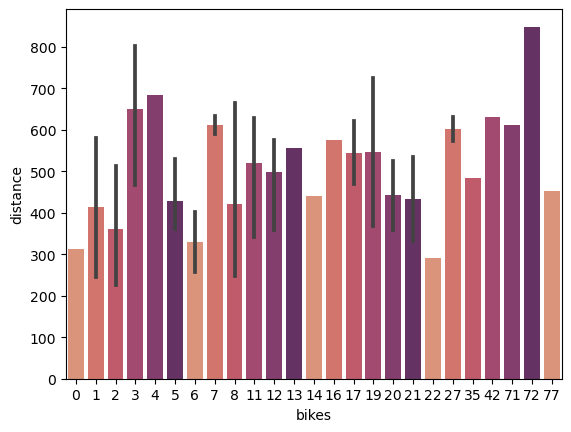

In [27]:
cmap= sns.color_palette("flare", as_cmap= False)
sns.barplot(data = join_data, x = join_data['bikes'], y = join_data['distance'], palette = cmap)
#plt.savefig("distance_bike_barplot.jpg", dpi = 400)
plt.show()

As we can see from the graph above, the number of bikes provided is distributed quite evenly base on the distance between the bike station and the restaurant location. The further the distance, the more available bikes at the station

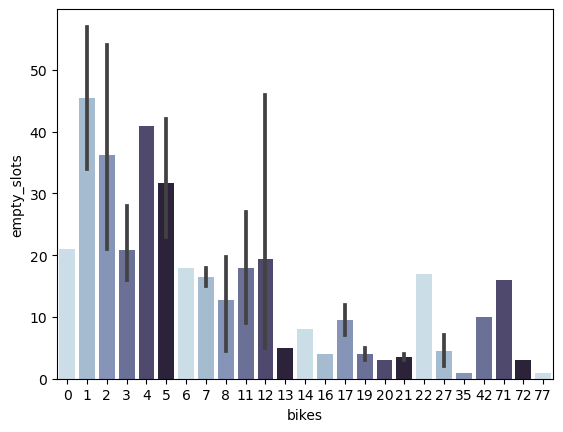

In [35]:
cmap= sns.color_palette("ch:s=.25,rot=-.25", as_cmap=False)
sns.barplot(data = join_data, x = join_data['bikes'], y = join_data['empty_slots'], palette = cmap)
#plt.savefig("emptyslot_bike_barplot.jpg", dpi = 400)
plt.show()

The relationship between empty slots and the number of bikes at a station is inverse. When there are more bikes, there are fewer empty slots and when there are fewer bikes, there are more empty slots. This reflects the demand for bikes in a particular location and helps to ensure that bikes are distributed evenly throughout the network.

* Hypothesis Testing

    1. Normal Testing


        check out the distribution of our numerical variables: number of bikes, empty slots, popularity, rating of the restaurant

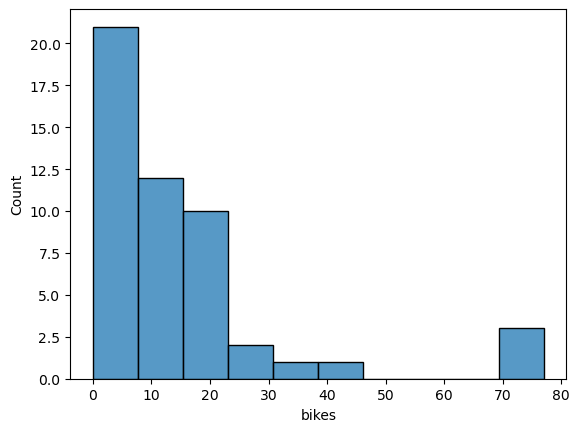

In [7]:
# the number of bikes data is right-skewed
sns.histplot(join_data['bikes'])
plt.show()

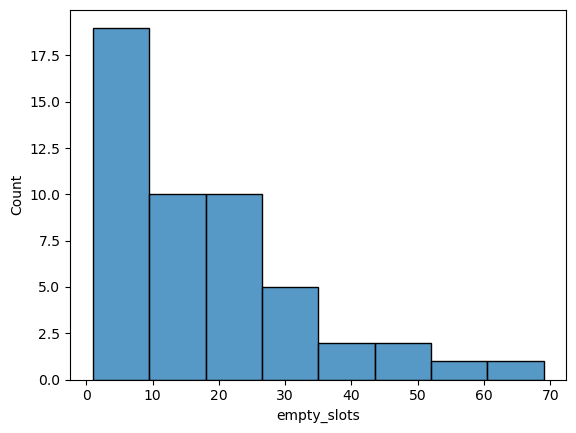

In [8]:
# empty slots is also right-skewed
sns.histplot(join_data['empty_slots'])
plt.show()

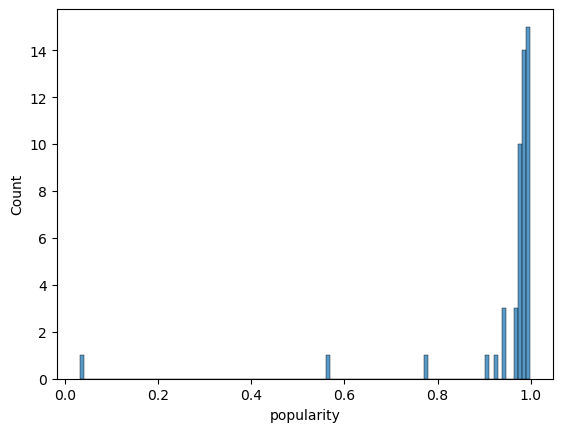

In [9]:
# the popularity data is left-skewed
sns.histplot(join_data['popularity'])
plt.show()

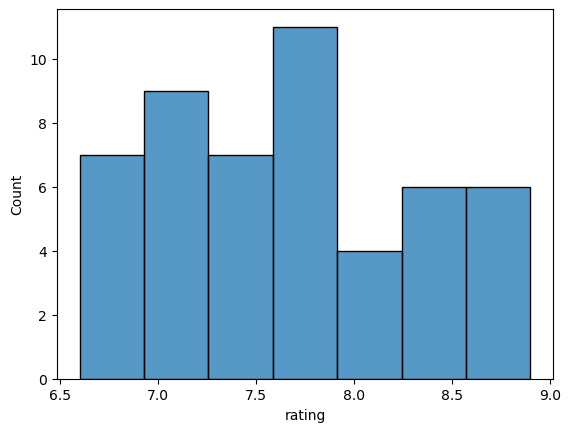

In [11]:
# The distribution of the rating data appears to be normal. To verify this hypothesis, we need to perform a Shapiro-Wilk test.
sns.histplot(join_data['rating'])
plt.show()

In [12]:
stat , p = stats.shapiro(join_data['rating'])
print("P-value:", '%0.30f' %p)

P-value: 0.023301521316170692443847656250


Because the p-value is smaller than 0.05, as a result, we reject the hypothesis that the data is ditributed normally

    2. Correlation Testing

After conducting a correlation testing, I can not find any correlation between number of bikes and other numerical variables

<AxesSubplot:xlabel='rating', ylabel='bikes'>

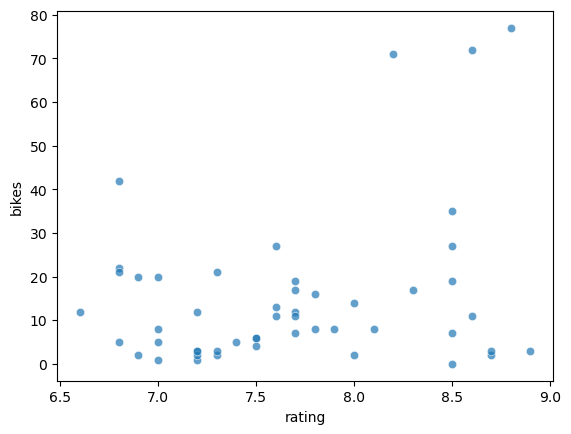

In [124]:
sns.scatterplot(x = join_data['rating'], y = join_data['bikes'], alpha = 0.7)

<AxesSubplot:xlabel='empty_slots', ylabel='bikes'>

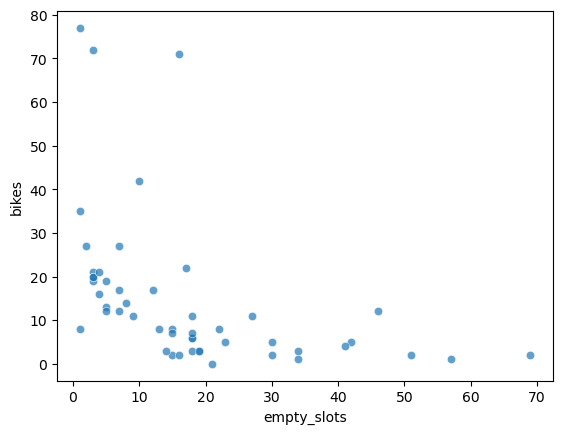

In [125]:
sns.scatterplot(x = join_data['empty_slots'], y = join_data['bikes'], alpha = 0.7)

<AxesSubplot:xlabel='popularity', ylabel='bikes'>

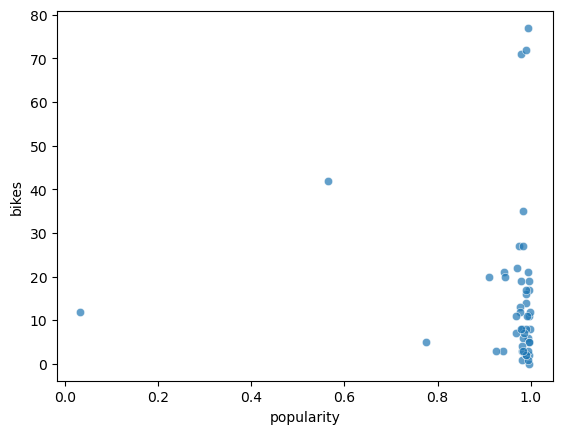

In [126]:
sns.scatterplot(x = join_data['popularity'], y = join_data['bikes'], alpha = 0.7)

<AxesSubplot:xlabel='distance', ylabel='bikes'>

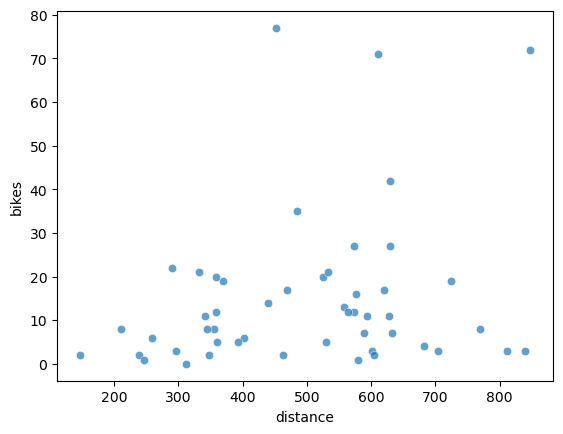

In [127]:
sns.scatterplot(x = join_data['distance'], y = join_data['bikes'], alpha = 0.7)

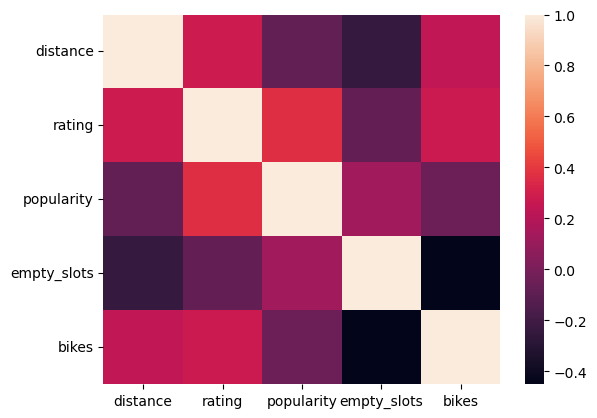

In [26]:
sns.heatmap(join_data.corr())
plt.savefig("heatmap.jpg", dpi = 400)
plt.show()

* Normalize Data

    1. Right-skewed data

P-values: 1.0


C:\Anaconda\envs\pandas_playground\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


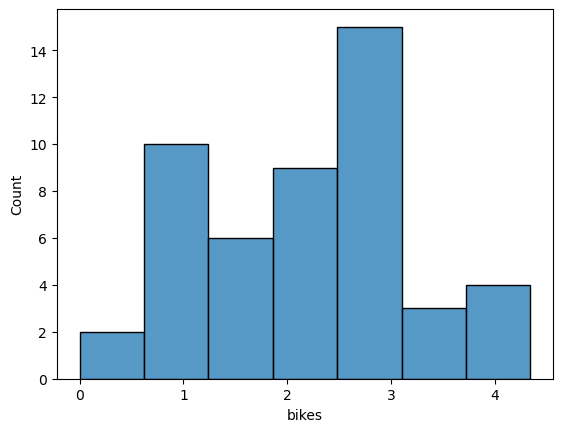

In [16]:
# Normalize number of bikes data
log_total_bikes = np.log(join_data['bikes'])

stat, p = stats.shapiro(log_total_bikes)
print('P-values:', p)
sns.histplot(log_total_bikes)
plt.show()

P-value: 0.11543378233909607


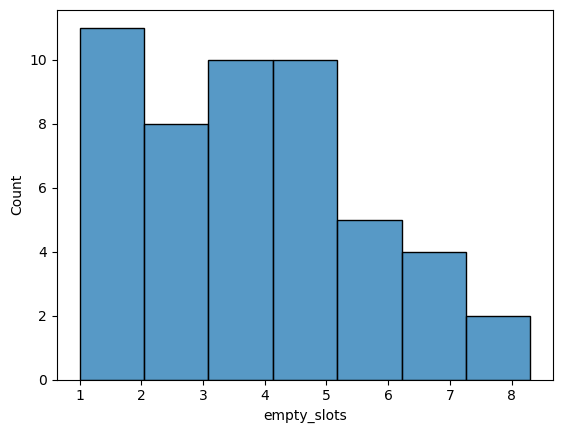

In [17]:
# Normalize empty_slots
sqrt_empty_slots = join_data['empty_slots']**(1/2)

stat, p = stats.shapiro(sqrt_empty_slots)
print("P-value:", p)
sns.histplot(sqrt_empty_slots)
plt.show()

    2.Left-skewed data

P-value: 1.7782068948823254e-13


<AxesSubplot:xlabel='popularity', ylabel='Count'>

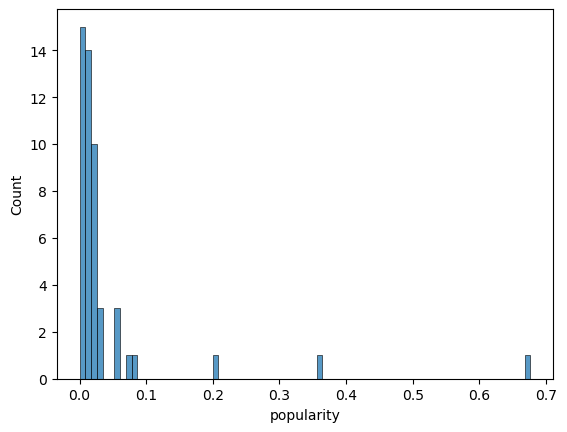

In [18]:
# normalize popularity data
log_popularity = np.log(join_data['popularity'].max() - join_data['popularity'] + 1)
stat, p = stats.shapiro(log_popularity)
print("P-value:", p)
sns.histplot(log_popularity)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Connect to Database

In [4]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [5]:
connection = sqlite3.connect("D:\Python(New)\Project\Project_Week_3\data\joining_data.sqlite")

In [ ]:
joining_data = join_data_original.to_sql('join_data',connection, index = False)

Look at the data before and after the join to validate your data.

The data before and after the join is similar